In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs=4

In [4]:
path = '/home/spriyanshu723/biomedical/Mask_with_2class/'

In [5]:
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().databunch(bs=bs))
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None

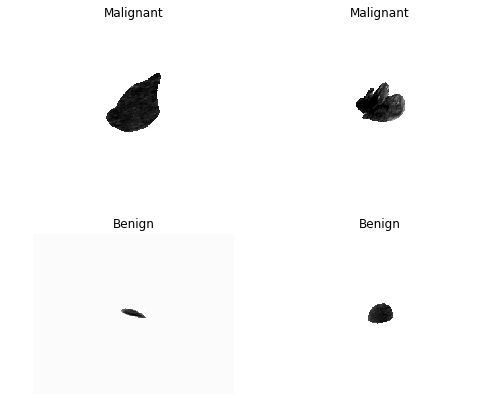

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes

['Benign', 'Malignant']

## TRAINING 

In [8]:
learn = cnn_learner(data, models.vgg16_bn, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


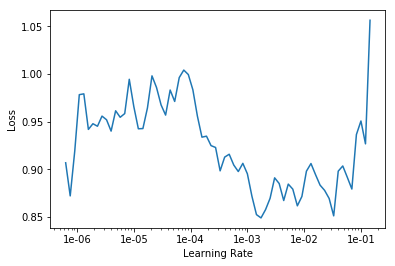

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.493114,0.415273,0.175613,02:52
1,0.426694,0.354773,0.157975,02:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


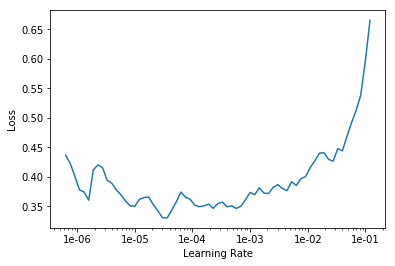

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.save('class_vgg16_1')

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.478003,0.347223,0.156442,02:52
1,0.477707,0.336215,0.144939,02:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


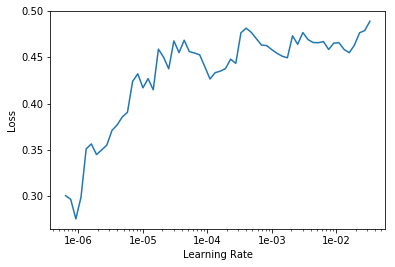

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.save('class_vgg16_2')

In [18]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.405488,0.339703,0.154141,02:52
1,0.413469,0.358136,0.160276,02:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


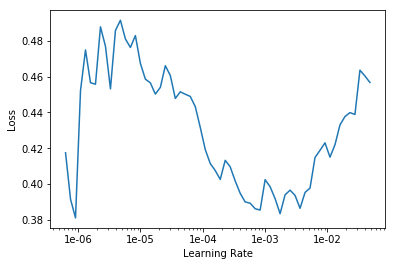

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.save('class_vgg16_3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


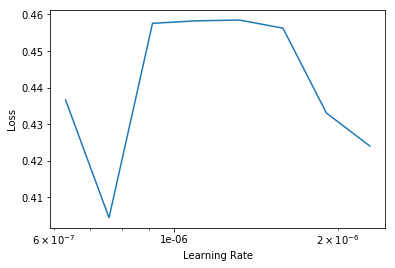

In [21]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(1, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.379533,0.340176,0.152607,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


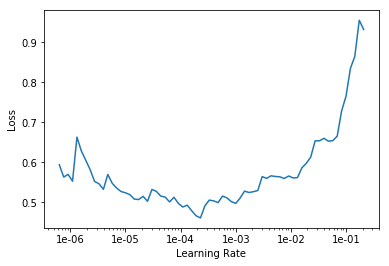

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.save('class_vgg16_4')

In [25]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.536353,0.448727,0.202454,03:52
1,0.450500,0.331307,0.125000,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


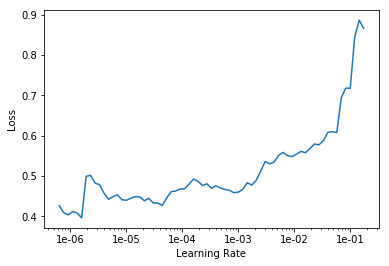

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.save('class_vgg16_5')

In [28]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.386324,0.325363,0.115031,03:52
1,0.390161,0.321632,0.116564,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


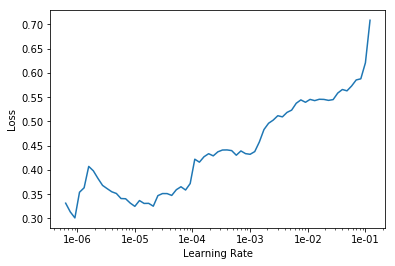

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.save('class_vgg16_6')

In [31]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.431703,0.318524,0.103528,03:52
1,0.408512,0.319805,0.099693,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


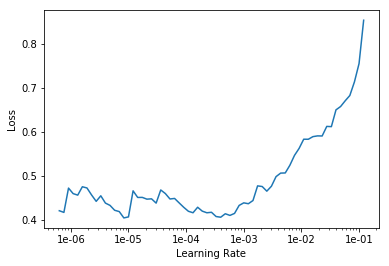

In [34]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.save('class_vgg16_7')

In [35]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.428238,0.317188,0.105828,03:52
1,0.422931,0.346880,0.146472,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


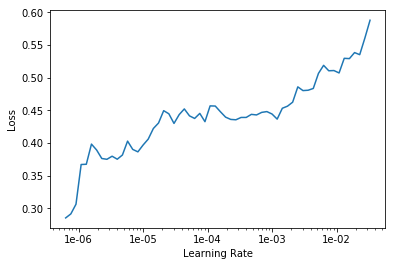

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.save('class_vgg16_8')

In [39]:
learn.load('class_vgg16_7')
learn.unfreeze()

In [40]:
lr=1e-6
learn.fit_one_cycle(2, max_lr=slice(lr/400, lr/4))

epoch,train_loss,valid_loss,error_rate,time
0,0.438379,0.336524,0.144939,03:52
1,0.447757,0.331412,0.131902,03:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


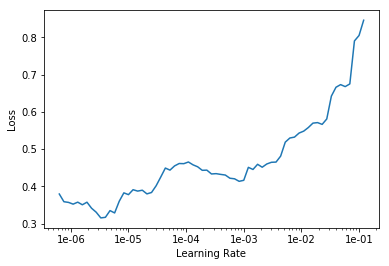

In [41]:
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.save('class_vgg16_9')

In [43]:
learn.load('class_vgg16_6')
learn.unfreeze()

In [10]:
learn.load('class_vgg16_7')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


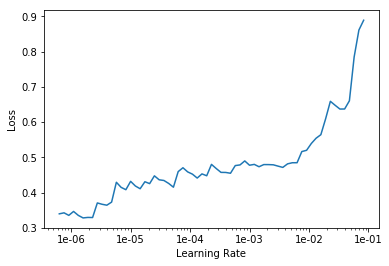

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.433021,0.324246,0.140337,03:52
1,0.468515,0.312504,0.125000,03:52


In [10]:
learn.load('class_vgg16_6')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


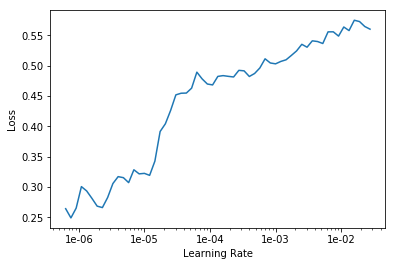

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.408127,0.333609,0.128834,03:52
1,0.454300,0.327942,0.125767,03:52


## Result 

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

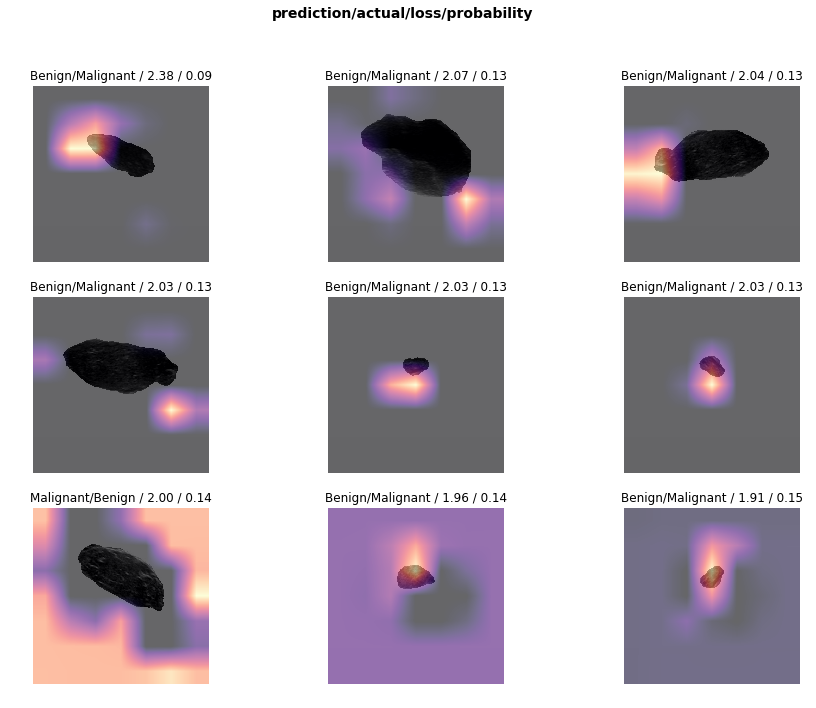

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [15]:
doc(interp.plot_top_losses)

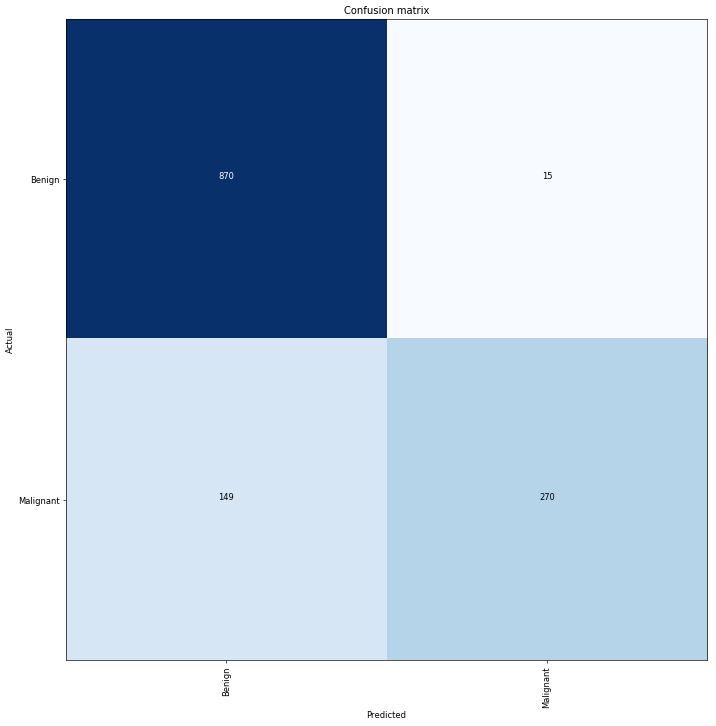

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)